# **Convolutional Neural Network**
## Take Home Quiz 3
### BSEF19A032 - ABDUL WAHAB MALIK




## Mounting Data From Drive

In [304]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cheetah  Leopard  Lion	Puma  Tiger


In [305]:
dataset_path = '/content/drive/My Drive/Dataset/'

## Importing Libraries

In [306]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## **Loading Data**

In [307]:
# 1 --> Creating List thats going to hold data

images = []
labels = []


# 2--> listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['Lion', 'Tiger', 'Cheetah', 'Leopard', 'Puma']

In [308]:
# Creating dictionaries to map folder names

name_mapping_dict = {'Lion'       : 0,
                     'Tiger'      : 1,
                     'Cheetah'    : 2,
                     'Leopard'    : 3,
                     'Puma'       : 4}

inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'Lion', 1: 'Tiger', 2: 'Cheetah', 3: 'Leopard', 4: 'Puma'}


# **Data Pre-Processing**

In [309]:
# 1--> looping through each folder and getting images and creating labels



img_size = 256        # we've to reshape the img thats why giving its size

for folder in folders:          # going through each folder

  filenames = os.listdir(dataset_path+folder+'/')     #getting inside the foddler

  for fname in filenames:         # going through each file in folder
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))         #resizing the image
    if(img.shape == (256,256,3)):
      images.append(img)                                  #storing image
      labels.append(name_mapping_dict[folder])            #storing label 

In [310]:
# 2 --> Converting Lists to NumPy array for easy matrix manipulation

images = np.array(images)
labels = np.array(labels)

In [311]:
# 3 --> Checking dataset

print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (241, 256, 256, 3)
labels shape :  (241,)


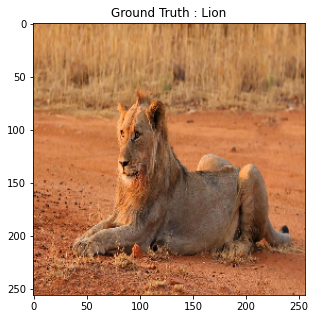

In [312]:
# 4 --> Checking plots
img_number = 10
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [313]:
# 5 --> Normalizing Images
images = np.array(images) / 255       # output range 0-1(both including)

In [314]:
# 6 --> Labeling our categories
labels_one_hot = keras.utils.to_categorical(labels)

In [315]:
labels[100]

2

In [316]:
labels_one_hot[100]

array([0., 0., 1., 0., 0.], dtype=float32)

# **Splitting Dataset into test and training model**

In [317]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (216, 256, 256, 3) (216, 5)
Testing data shape :  (25, 256, 256, 3) (25, 5)


# **Designing Neural Network**

In [318]:
model = keras.models.Sequential([keras.layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation= tf.nn.relu),
                                 keras.layers.Dense(128, activation= tf.nn.relu),
                                 keras.layers.Dense(64, activation= tf.nn.relu),
                                 keras.layers.Dense(5, activation=tf.nn.softmax)])

# **Compliling Model**

In [319]:
model.compile(optimizer= tf.optimizers.Adam(), loss = tf.losses.categorical_crossentropy, metrics=['accuracy'])

# **CallBack Method**

In [320]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

# **Training Model**

In [321]:
callbacks = myCallback()
history = model.fit(train_images, train_labels, batch_size=50, epochs=15, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/15
5/5 [==============================] - 21s 4s/step - loss: 5.2415 - accuracy: 0.2083 - val_loss: 3.2657 - val_accuracy: 0.1600
Epoch 2/15
5/5 [==============================] - 19s 4s/step - loss: 1.9812 - accuracy: 0.2593 - val_loss: 1.6586 - val_accuracy: 0.2000
Epoch 3/15
5/5 [==============================] - 19s 4s/step - loss: 1.4759 - accuracy: 0.3519 - val_loss: 1.5226 - val_accuracy: 0.2800
Epoch 4/15
5/5 [==============================] - 19s 4s/step - loss: 1.2682 - accuracy: 0.5046 - val_loss: 1.7809 - val_accuracy: 0.4000
Epoch 5/15
5/5 [==============================] - 19s 4s/step - loss: 0.9588 - accuracy: 0.6944 - val_loss: 1.6063 - val_accuracy: 0.2800
Epoch 6/15
5/5 [==============================] - 19s 4s/step - loss: 0.7180 - accuracy: 0.7685 - val_loss: 1.6243 - val_accuracy: 0.2800
Epoch 7/15
5/5 [==============================] - 19s 4s/step - loss: 0.5019 - accuracy: 0.8472 - val_loss: 1.6274 - val_accuracy: 0.4000
Epoch 8/15
5/5 [==================

# **Testing Model**

In [322]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

1/1 [==============================] - 1s 569ms/step - loss: 2.5764 - accuracy: 0.4000
Evaluation result on Test Data : Loss = 2.576446294784546, accuracy = 40.00000059604645


Model prediction: Tiger


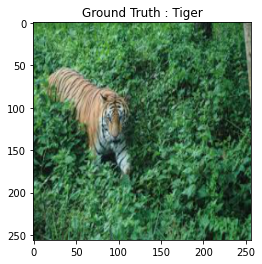

In [327]:
# 2 --> 
# Predict the most likely class
test_img_number = 3

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show() 

Model prediction: Tiger


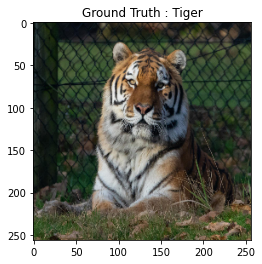

In [331]:
test_img_number = 22

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Puma


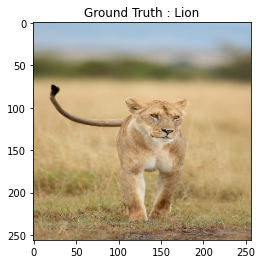

In [336]:
test_img_number = 2

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Cheetah


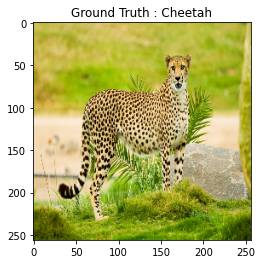

In [337]:
test_img_number = 4

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()